In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport classifier

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import classifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [2]:
with open('features.txt') as f:
    xis = np.loadtxt(f, delimiter=',')
with open('target.txt') as f:
    yis = np.loadtxt(f)

In [3]:
train_xis = xis[:5000,:]
train_yis = yis[:5000]

test_xis = xis[5000:,:]
test_yis = yis[5000:]

Batch size: 1, Accuracy: 0.758133
Batch size: 10, Accuracy: 0.758133
Batch size: 100, Accuracy: 0.758133


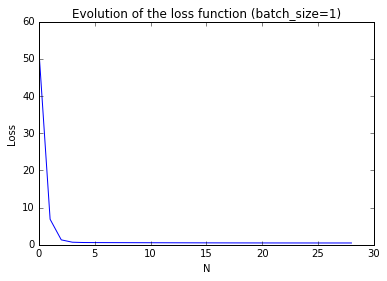

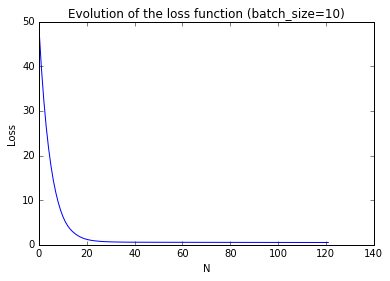

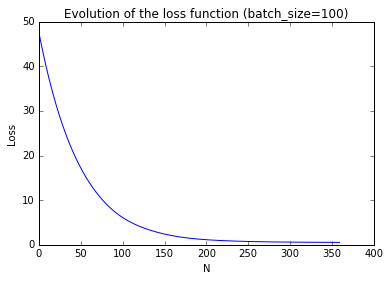

In [6]:
for batch_size in [1, 10, 100]:
    sc = classifier.SvmClassifier(lambd=1.0, eta=0.0001)
    sc.fit_sgds(train_xis, train_yis, N=1000,batch_size=batch_size)

    plt.figure()
    plt.plot(sc.losses)
    plt.title('Evolution of the loss function (batch_size=%d)' % batch_size)
    plt.xlabel('N')
    plt.ylabel('Loss')
    
    predictions = sc.predict(test_xis)
    print("Batch size: %d, Accuracy: %f" % (batch_size, accuracy_score(test_yis, predictions)))

In [5]:
# SGDClassifier from sklearn perfectly matches the results.
lsvc = SGDClassifier(alpha=1)  # alpha parameter is lambda in my code.
lsvc.fit(train_xis, train_yis)
predictions = lsvc.predict(test_xis)
accuracy_score(test_yis, predictions)

0.75813295615275811